# Dask Delayed

Материалы:
* Макрушин С.В. Лекция 13: Dask Delayed
* https://docs.dask.org/en/latest/delayed.html
* JESSE C. DANIEL. Data Science with Python and Dask.


Dask delayed- распаралелливание вычислений. Вычисления второго задания не начнутся перед или во время вычисления первого 

## Задачи для совместного разбора

![](https://i.imgur.com/AwiN8y6.png)
![](https://i.imgur.com/ceY6guU.png)

1. Напишите 2 функции, имитирующие CPU-bound задачу и IO-bound задачу:

`cpu_task()`: генерирует 100 тыс. случайных чисел и возвращает их сумму (без использования `numpy`)

`io_task()`: "спит" 0.1 сек, затем генерирует случайное число и возвращает его

Замерьте время выполнения 100 последовательных вызовов каждой из этих функций. Распараллелив вычисления при помощи `dask.delayed`, сократите время выполнения. Исследуйте, как зависит время вычислений от выбранного планировщика `scheduler`.

In [ ]:
import random
import time

import dask.bag


def cpu_task():
	lst = [random.randint(0, 10) for _ in range(100_000)]
	return sum(lst)

def io_task():
	time.sleep(0.1)
	return random.randint(0, 10)

In [ ]:
%%time
res = [cpu_task() for _ in range(100)]

CPU times: user 7.3 s, sys: 0 ns, total: 7.3 s
Wall time: 7.35 s


In [ ]:
%%time
res = [io_task() for _ in range(100)]

CPU times: user 70 ms, sys: 0 ns, total: 70 ms
Wall time: 10 s


In [ ]:
from dask import delayed
from dask import compute

In [ ]:
cpu_task_delayed = delayed(cpu_task)

In [ ]:
cpu_task_delayed

Delayed('cpu_task-69dd7dac-8249-49cc-8bb5-77171ce43e85')

In [ ]:
%%time
res = [cpu_task_delayed() for _ in range(100)]
compute(res)

CPU times: user 8.91 s, sys: 27.7 ms, total: 8.94 s
Wall time: 9.1 s


([498447,
  500303,
  500791,
  500091,
  498308,
  499354,
  500807,
  500555,
  499218,
  499815,
  499048,
  500469,
  499448,
  500075,
  500095,
  499906,
  499656,
  500185,
  499459,
  499979,
  501139,
  500004,
  498835,
  500771,
  499599,
  499330,
  501411,
  500444,
  499420,
  497884,
  500080,
  500293,
  500580,
  498428,
  501322,
  501290,
  500601,
  500566,
  500227,
  499889,
  499910,
  500189,
  500656,
  500835,
  501172,
  499439,
  501338,
  500139,
  500955,
  500377,
  500880,
  500233,
  499132,
  500825,
  500087,
  500671,
  500463,
  501643,
  500405,
  499838,
  499154,
  500726,
  500172,
  500186,
  499858,
  498880,
  500216,
  499312,
  502853,
  499971,
  501334,
  499448,
  498827,
  500499,
  501715,
  497523,
  500432,
  497505,
  499080,
  497225,
  498369,
  501254,
  499425,
  500862,
  500823,
  501001,
  499664,
  500768,
  499047,
  499974,
  502117,
  499771,
  499822,
  500589,
  499358,
  499909,
  500256,
  499592,
  501340,
  501023],

In [ ]:
%%time
res = [cpu_task_delayed() for _ in range(100)]
res_computed = compute(res, scheduler='multiprocessing')

CPU times: user 104 ms, sys: 6.18 ms, total: 111 ms
Wall time: 9.14 s


In [ ]:
io_task_delayed = delayed(io_task)

In [ ]:
%%time
res = [io_task_delayed() for _ in range(100)]
res_computed = compute(res, scheduler='threading')

CPU times: user 62.5 ms, sys: 8.1 ms, total: 70.7 ms
Wall time: 5.05 s


In [ ]:
%%time
res = [io_task_delayed() for _ in range(100)]
res_computed = compute(res, scheduler='multiprocessing')

CPU times: user 76.7 ms, sys: 5.19 ms, total: 81.9 ms
Wall time: 5.67 s


## Лабораторная работа 14

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import xml.etree.ElementTree as ET
import dask
from dask import delayed
from dask import bag as db
from dask import dataframe as df
from dask import compute
from pprint import pp
import re

1. Напишите функцию, которая считывает файл формата xml из архива `reviewers_full.zip` и по данным этого файла формирует список словарей, содержащих следующие ключи: `username`, `name`, `sex`, `country`, `mail`, `registered`, `birthdate`, `name_prefix`, `country_code`. Часть из этих значений в исходном файле хранится в виде тэгов, часть - в виде атрибутов тэгов. Для конкретного человека какие-то из этих ключей могут отсутствовать. 



In [ ]:
def xml_to_dict(file):
	tree = ET.parse(file)
	root = tree.getroot()
	user_list = []
	for child in root.findall('user'):
		user_dict = {
				"id": None,
				"username": None,
				"name": None,
				"sex": None,
				"country": None,
				"mail": None,
				"registered": None,
				"birthdate": None,
				"name_prefix": None,
				"country_code": None,
			}

		try:
			user_dict["id"] = child.find("id").text
		except:
			pass

		try:
			user_dict["username"] = child.find("username").text
		except:
			pass

		try:
			user_dict["name"] = child.find("name").text
		except:
			pass

		try:
			user_dict["sex"] = child.find("sex").text
		except:
			pass

		try:
			user_dict["country"] = child.find("country").text
		except:
			pass

		try:
			user_dict["mail"] = child.find("mail").text
		except:
			pass

		try:
			user_dict["registered"] = child.find("registered").text
		except:
			pass

		try:
			user_dict["birthdate"] = child.find("birthdate").text
		except:
			pass

		try:
			user_dict["name_prefix"] = child.attrib["prefix"]
		except:
			pass

		try:
			user_dict["country_code"] = child.find("country").attrib["code"]
		except:
			pass
		user_list.append(user_dict)
	return user_list

In [ ]:
file= '/content/drive/MyDrive/reviewers_full_0.xml'
ul = xml_to_dict(file)
ul[0]

{'id': '556011',
 'username': 'gabrielacalhoun',
 'name': None,
 'sex': 'F',
 'country': None,
 'mail': None,
 'registered': None,
 'birthdate': '1988-01-25',
 'name_prefix': 'Mrs.',
 'country_code': None}

2. Измерьте время выполнения функции из задания 1 на всех файлах из архива. Ускорьте время выполнения, используя `dask.delayed`.

In [ ]:
%%time
for filename in range(0, 4):
	with open('/content/drive/MyDrive/reviewers_full_'+str(filename)+'.xml', "r") as file:
		out = xml_to_dict(file)
		# print(out[0])



CPU times: user 4.04 s, sys: 142 ms, total: 4.18 s
Wall time: 5.17 s


In [ ]:
%%time
lst = []
for i in range(0, 4):
	lst.append(xml_to_dict("/content/drive/MyDrive/reviewers_full_"+str(i)+".xml"))

CPU times: user 5.66 s, sys: 229 ms, total: 5.89 s
Wall time: 6.22 s


In [ ]:
for i in lst:
	print(i[0])

{'id': '556011', 'username': 'gabrielacalhoun', 'name': None, 'sex': 'F', 'country': None, 'mail': None, 'registered': None, 'birthdate': '1988-01-25', 'name_prefix': 'Mrs.', 'country_code': None}
{'id': '394270', 'username': 'bridgesdennis', 'name': 'Melissa Vaughn', 'sex': 'F', 'country': None, 'mail': 'carmengonzales@hotmail.com', 'registered': None, 'birthdate': '1992-07-28', 'name_prefix': 'Mrs.', 'country_code': None}
{'id': '2951090', 'username': 'jesse68', 'name': None, 'sex': None, 'country': 'Jamaica', 'mail': 'kaitlyn40@yahoo.com', 'registered': '2019-03-31', 'birthdate': '1980-04-30', 'name_prefix': None, 'country_code': 'JM'}
{'id': '46542', 'username': 'dawn16', 'name': None, 'sex': None, 'country': 'Serbia', 'mail': 'murrayshannon@gmail.com', 'registered': '2019-11-24', 'birthdate': '2018-06-10', 'name_prefix': None, 'country_code': 'RS'}


In [ ]:
%%time
tasks = []
for i in range(0, 4):
	tasks.append(dask.delayed(xml_to_dict("/content/drive/MyDrive/reviewers_full_"+str(i)+".xml")))

res_computed = compute(tasks, scheduler='threading')

CPU times: user 35.2 s, sys: 678 ms, total: 35.9 s
Wall time: 36.2 s


In [ ]:
for i in res_computed[0]:
	print(i[0])

{'id': '556011', 'username': 'gabrielacalhoun', 'name': None, 'sex': 'F', 'country': None, 'mail': None, 'registered': None, 'birthdate': '1988-01-25', 'name_prefix': 'Mrs.', 'country_code': None}
{'id': '394270', 'username': 'bridgesdennis', 'name': 'Melissa Vaughn', 'sex': 'F', 'country': None, 'mail': 'carmengonzales@hotmail.com', 'registered': None, 'birthdate': '1992-07-28', 'name_prefix': 'Mrs.', 'country_code': None}
{'id': '2951090', 'username': 'jesse68', 'name': None, 'sex': None, 'country': 'Jamaica', 'mail': 'kaitlyn40@yahoo.com', 'registered': '2019-03-31', 'birthdate': '1980-04-30', 'name_prefix': None, 'country_code': 'JM'}
{'id': '46542', 'username': 'dawn16', 'name': None, 'sex': None, 'country': 'Serbia', 'mail': 'murrayshannon@gmail.com', 'registered': '2019-11-24', 'birthdate': '2018-06-10', 'name_prefix': None, 'country_code': 'RS'}


3. Задекорируйте функцию из задания 1 при помощи `dask.delayed` и создайте список `reviewers`, состоящий из 5 объектов `delayed` (по одному объекту на файл). Из списка объектов `delayed`, создайте `dask.bag` при помощи метода `db.from_delayed`. Добавьте ключ `birth_year`, в котором хранится год рождения человека. Оставьте в выборке только тех людей, которые __наверняка__ моложе 1980 года. Преобразуйте поле `id` к целому типу.

In [ ]:
delayed(xml_to_dict)

Delayed('xml_to_dict-1d8711d0-3425-497e-b2bb-923e89e8eb46')

In [ ]:
reviewers = []

for i in range(0, 4):
	reviewers.append(dask.delayed(xml_to_dict("/content/drive/MyDrive/reviewers_full_"+str(i)+".xml")))

reviewers

[Delayed('list-86aab743-e0fd-4ce0-892e-d1caa3087aed'),
 Delayed('list-9ba95cdf-2f55-4cac-b068-c83e752a81ff'),
 Delayed('list-b0de388a-67cc-422f-8198-760364cd0e16'),
 Delayed('list-6916332c-d878-44b6-9704-7d1d49ada2f8')]

In [ ]:
dbag = db.from_delayed(reviewers)
dbag

dask.bag<bag-from-delayed, npartitions=4>

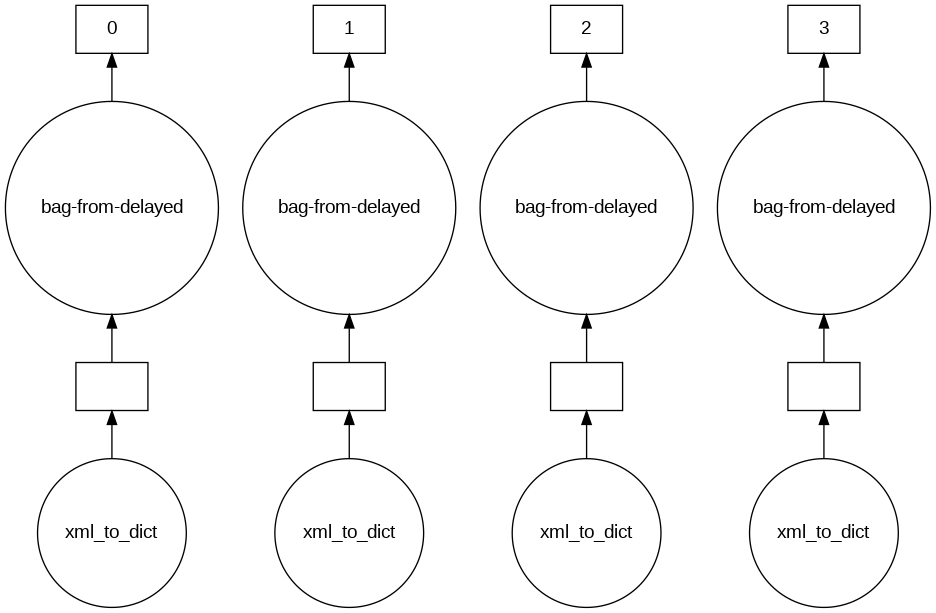

In [ ]:
dbag.visualize()

In [ ]:
def add_birth_year_and_filter(x):
	x["id"] = int(x["id"])
	if x["birthdate"]:
		age = int(x["birthdate"].split("-")[0])
		x["birth_year"] = age
		if age > 1980:
			return x

process_result = dbag.map(add_birth_year_and_filter).filter(bool)
process_result.take(5)

({'id': 556011,
  'username': 'gabrielacalhoun',
  'name': None,
  'sex': 'F',
  'country': None,
  'mail': None,
  'registered': None,
  'birthdate': '1988-01-25',
  'name_prefix': 'Mrs.',
  'country_code': None,
  'birth_year': 1988},
 {'id': 1251087,
  'username': 'qbaxter',
  'name': None,
  'sex': None,
  'country': 'Norway',
  'mail': 'qware@gmail.com',
  'registered': None,
  'birthdate': '1985-01-19',
  'name_prefix': None,
  'country_code': 'NO',
  'birth_year': 1985},
 {'id': 250427,
  'username': 'karen27',
  'name': 'Jennifer Horne',
  'sex': None,
  'country': 'Cuba',
  'mail': 'wjarvis@yahoo.com',
  'registered': '2013-11-20',
  'birthdate': '2007-04-30',
  'name_prefix': None,
  'country_code': 'CU',
  'birth_year': 2007},
 {'id': 452355,
  'username': 'smullen',
  'name': 'Cynthia Johnson',
  'sex': 'F',
  'country': None,
  'mail': None,
  'registered': None,
  'birthdate': '2005-03-29',
  'name_prefix': 'Miss',
  'country_code': None,
  'birth_year': 2005},
 {'id': 20

4. Из `dask.bag`, полученного в задании 3, создайте `dask.dataframe` при помощи метода `bag.to_dataframe`. Укажите столбец `id` в качестве индекса.

In [33]:
process_result.to_dataframe().reset_index().set_index("id")

,index,username,name,sex,country,mail,registered,birthdate,name_prefix,country_code,birth_year
npartitions=4,,,,,,,,,,,
1676,int64,object,object,object,object,object,object,object,object,object,int64
367135,...,...,...,...,...,...,...,...,...,...,...
1300575,...,...,...,...,...,...,...,...,...,...,...
1802438284,...,...,...,...,...,...,...,...,...,...,...
2002371716,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
daskdf = process_result.to_dataframe().reset_index().set_index("id").drop(columns='index')
daskdf

,username,name,sex,country,mail,registered,birthdate,name_prefix,country_code,birth_year
npartitions=4,,,,,,,,,,
1676,object,object,object,object,object,object,object,object,object,int64
367135,...,...,...,...,...,...,...,...,...,...
1300575,...,...,...,...,...,...,...,...,...,...
1802438284,...,...,...,...,...,...,...,...,...,...
2002371716,...,...,...,...,...,...,...,...,...,...


5. Назовем отзыв негативным, если оценка равна 0, 1 или 2. Загрузите данные о негативных отзывах из файлов архива `reviews_full` (__ЛР12__) в виде `dask.DataFrame`. Посчитайте количество отзывов с группировкой по пользователю, оставившему отзыв. Объедините результат с таблицей, полученной в задаче 4.

In [34]:

path = "/content/drive/MyDrive/reviews_*.json"

In [35]:
reviews_df = df.read_json(path)

In [36]:
reviews_df.head().set_index("user_id")

,recipe_id,date,review
user_id,,,
452355,292657,2016-05-08,WOW!!! This is the best. I have never been abl...
329304,433404,2006-06-14,This was good but the dressing needed somethin...
227932,2008187,1985-11-19,"Very good,it was a hit for my family. I used 6..."
171468,270716,2019-05-21,Made for ZWT-8 Family Picks after I saw these ...
91392,1159916,1972-09-18,Very nice slaw. I especially like that it does...


In [37]:
grouped_df = reviews_df.groupby("user_id")["recipe_id"].count().to_frame().rename(columns={"recipe_id": "review_count"})
grouped_df.compute()

,review_count
user_id,
1533,95
1535,711
1634,53
1676,37
1755,6
...,...
2002369511,1
2002369789,1
2002369856,1


In [38]:
daskdf.merge(grouped_df, how="left").head()

,username,name,sex,country,mail,registered,birthdate,name_prefix,country_code,birth_year,review_count
id,,,,,,,,,,,
1676,lgeorge,None,M,None,None,None,1983-06-24,None,None,1983,37.0
1792,qbeard,None,F,Guinea,rachel20@hotmail.com,None,1986-03-12,None,GN,1986,24.0
1938,adambrown,William Fisher,None,New Caledonia,None,2019-05-03,1991-11-11,None,NC,1991,3.0
2046,vthompson,Emily Sanford,F,United Arab Emirates,omelendez@yahoo.com,2001-10-30,1981-11-27,None,AE,1981,4.0
2095,djohnson,Jennifer Hawkins,F,Jamaica,None,None,1984-09-23,Mrs.,JM,1984,NaN
